In [7]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mplsoccer.pitch import Pitch
import numpy as np
from scipy.spatial import ConvexHull
from scipy import stats
import seaborn as sns
import ipywidgets as widgets
from highlight_text import  ax_text, fig_text
import warnings

#Read in the data
df = pd.read_csv('BG.csv', encoding='latin-1')

#Adjust to pitch size
df['X'] = df['X']*1.2
df['Y'] = df['Y']*.8
df['X2'] = df['X2']*1.2
df['Y2'] = df['Y2']*.8

df = df[['Player','Number','X', 'Y']]
df

,Player,Number,X,Y
0,Brendan Gan,88,117.6,19.2
1,Brendan Gan,88,106.8,31.2
2,Brendan Gan,88,64.8,8.8
3,Brendan Gan,88,70.8,9.6
4,Brendan Gan,88,48.0,35.2
5,Brendan Gan,88,54.0,16.8
6,Brendan Gan,88,44.4,36.8
7,Brendan Gan,88,66.0,23.2
8,Brendan Gan,88,66.0,17.6
9,Brendan Gan,88,82.8,18.4


In [12]:
#Find median
MedianTouch = df.groupby('Number').agg({'X': ['median'], 'Y': ['median']})

#use astype to convert to int
MedianTouch.index = MedianTouch.index.astype(int)

#filter that dataframe to exclude outliers. Anything over a z score of 1 will be excluded for the data points
df1 = df[(np.abs(stats.zscore(df[['X','Y']])) < 1)]
df1 = df1[['X', 'Y']]
df1 = df1.dropna()

#Create an array of the x/y coordinate groups
points = df1[['X', 'Y']].values

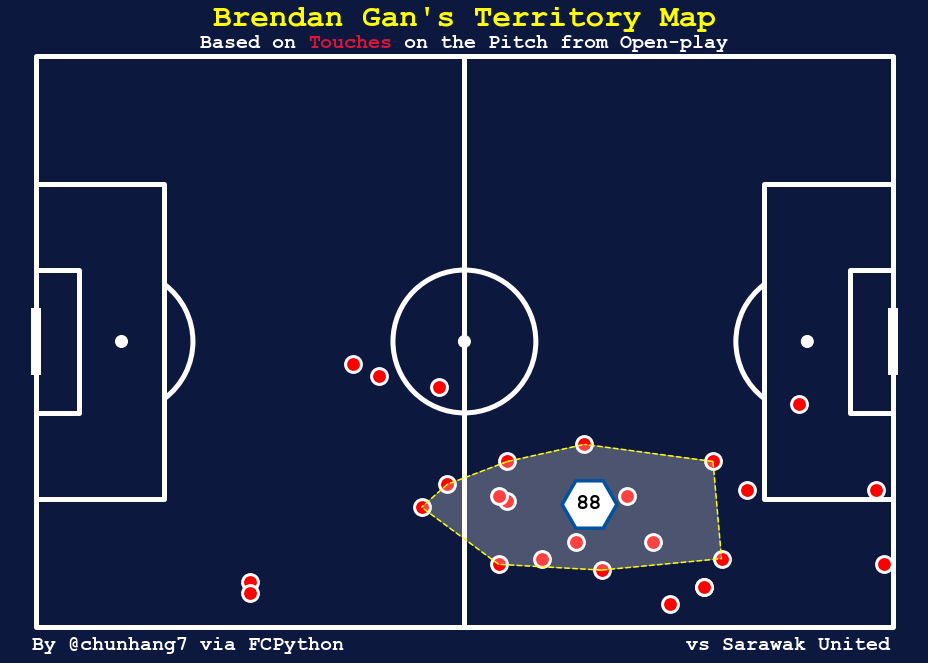

In [18]:
#Set up pitch
pitch = Pitch(pitch_type='statsbomb',linewidth=5, spot_scale=0.007,
             pitch_color='#0d183f',line_color='w')
fig,ax = pitch.draw(figsize=(13, 11), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#0d183f')

#Inverse the y-axis
plt.gca().invert_yaxis()

#plot the pass locations
plt.scatter(df.X, df.Y, marker='o', s=250, c='red',
            linewidth = 3, edgecolor='w')

#Create the convex hull
hull = ConvexHull(df1[['X','Y']])

#Loop through each of the hull's simplices
for i in hull.simplices:
    plt.plot(points[i, 0], points[i, 1], 'yellow', ls ='--')
    plt.fill(points[hull.vertices,0], points[hull.vertices,1], c='white', alpha=0.04)

#plot the Median location
plt.scatter(MedianTouch.X, MedianTouch.Y, marker='H', s=3000, c='w', 
            linewidth = 3.5, edgecolor='#00529F')

#Kit Numbers on Nodes
for index, row in MedianTouch.iterrows():
    pitch.annotate(row.name, xy=(row.X,row.Y), c='black', va='center', ha='center', 
                   size=22, fontweight='bold', fontfamily="Courier New",ax=ax)

#Title & Annotations
fig.suptitle("Brendan Gan's Territory Map", fontsize=31, color='yellow',
            fontfamily = "Courier New", fontweight = "bold",y=0.9)

highlight_textprops =\
    [{"color": "crimson","fontweight": 'bold'}]

Title = fig_text(s = "Based on <Touches> on the Pitch from Open-play" ,
        x = 0.5, y = 0.865, highlight_textprops = highlight_textprops ,color='white',
        fontfamily = "Courier New",fontweight='bold', ha='center',fontsize=20);

#Credits
ax.text(-0.5, -2.5, 'By @chunhang7 via FCPython', va='center', ha='left', 
        fontfamily = "Courier New", fontsize=20, 
        color='w',fontweight='bold')

ax.text(91, -2.5, 'vs Sarawak United', va='center', ha='left', fontsize=20, color='w',
        fontweight = "bold",fontfamily = "Courier New")

plt.show()